In [43]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from scipy import stats
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
filename  = './dataset/ifood_df.csv'
dataset_df = pd.read_csv(filename)

In [5]:
dataset_df.head(10)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   
5  62513.0        0         1       16       520         42               98   
6  55635.0        0         1       34       235         65              164   
7  33454.0        1         0       32        76         10               56   
8  30351.0        1         0       19        14          0               24   
9   5648.0        1         1       68        28          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   
5                0                42            14  ...                 1   
6               50                49            27  ...                 0   
7                3                 1            23  ...                 0   
8                3                 3             2  ...                 1   
9                1                 1            13  ...                 1   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   
5              0                   0                0                     0   
6              0                   0                0                     1   
7              0                   0                0                     0   
8              0                   0                0                     0   
9              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   
5                 1              0       702              688   
6                 0              0       563              536   
7                 0              1       146              123   
8                 0              1        44               42   
9                 0              1        36               23   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0  
6                   0  
7                   0  
8                   0  
9                   1  

[10 rows x 39 columns]

In [3]:
dataset_df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [4]:
def summarize(inputdf):
    cnt = inputdf.count() #計算項目數
    isNA = inputdf.isnull().sum() #計算有多少缺失值
    nmean = inputdf.mean() #計算項目平均值
    nmax = inputdf.max()
    nmin = inputdf.min()
    nmedian = inputdf.median() #中位數
    nQ1 = inputdf.quantile(0.25) #第一四分位數
    nQ3 = inputdf.quantile(0.75) #第三四分位數
    summarize_dic = {
        '項目數' : cnt,
        '缺失值' : isNA,
        '平均值' : nmean,
        '最小值' : nmin,
        '最大值' : nmax,
        '中位數' : nmedian,
        '第一四分位數' : nQ1,
        '第三四分位數' : nQ3
    }
    summarivze_df = pd.DataFrame.from_dict(summarize_dic, orient = 'index', columns = ['value'])

    return(summarivze_df)

    

In [6]:
len(dataset_df.columns)
#dataset_df['Teenhome'].dtype in ['float64','int']

39

In [40]:
for i in range(len(dataset_df.columns)):
    colname = dataset_df.columns[i]
    print(dataset_df[colname].head(1))

0    58138.0
Name: Income, dtype: float64
0    0
Name: Kidhome, dtype: int64
0    0
Name: Teenhome, dtype: int64
0    58
Name: Recency, dtype: int64
0    635
Name: MntWines, dtype: int64
0    88
Name: MntFruits, dtype: int64
0    546
Name: MntMeatProducts, dtype: int64
0    172
Name: MntFishProducts, dtype: int64
0    88
Name: MntSweetProducts, dtype: int64
0    88
Name: MntGoldProds, dtype: int64
0    3
Name: NumDealsPurchases, dtype: int64
0    8
Name: NumWebPurchases, dtype: int64
0    10
Name: NumCatalogPurchases, dtype: int64
0    4
Name: NumStorePurchases, dtype: int64
0    7
Name: NumWebVisitsMonth, dtype: int64
0    0
Name: AcceptedCmp3, dtype: int64
0    0
Name: AcceptedCmp4, dtype: int64
0    0
Name: AcceptedCmp5, dtype: int64
0    0
Name: AcceptedCmp1, dtype: int64
0    0
Name: AcceptedCmp2, dtype: int64
0    0
Name: Complain, dtype: int64
0    3
Name: Z_CostContact, dtype: int64
0    11
Name: Z_Revenue, dtype: int64
0    1
Name: Response, dtype: int64
0    63
Name: Age, dty


            欄位：Income
            摘要：
                              value
項目數       2205.000000
缺失值          0.000000
平均值      51622.094785
最小值       1730.000000
最大值     113734.000000
中位數      51287.000000
第一四分位數   35196.000000
第三四分位數   68281.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：Kidhome
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.442177
最小值        0.000000
最大值        2.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     1.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：Teenhome
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.506576
最小值        0.000000
最大值        2.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     1.000000

            ---------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)



            欄位：Customer_Days
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值     2512.718367
最小值     2159.000000
最大值     2858.000000
中位數     2515.000000
第一四分位數  2339.000000
第三四分位數  2688.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：marital_Divorced
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.104308
最小值        0.000000
最大值        1.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     0.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：marital_Married
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.387302
最小值        0.000000
最大值        1.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     1.000000

            ----------------------------

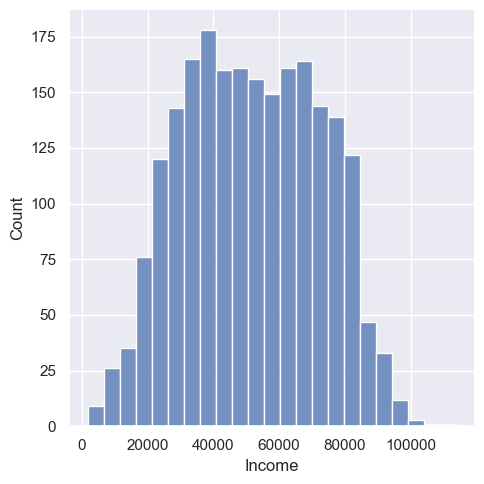

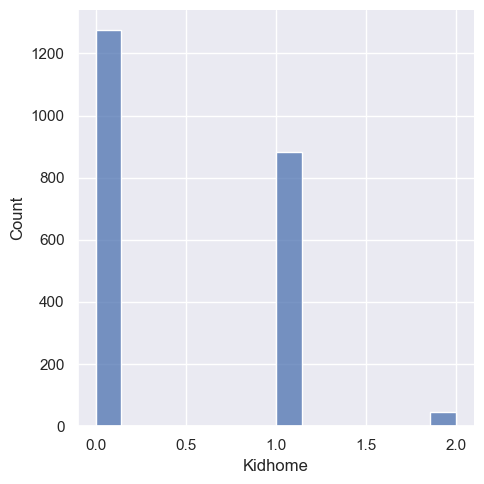

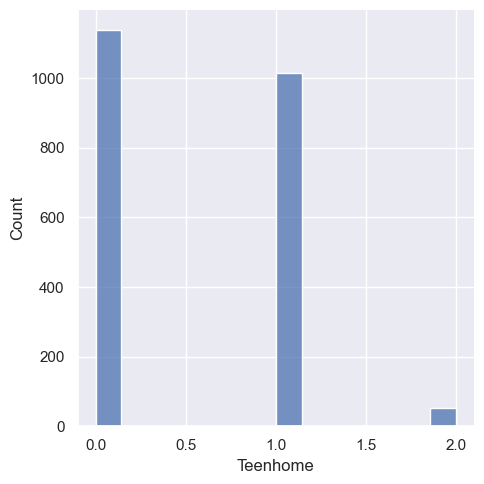

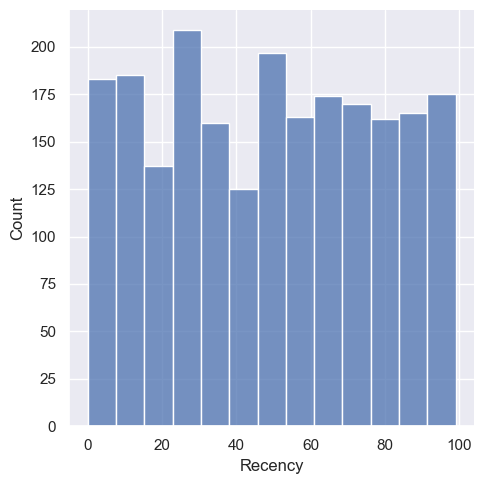

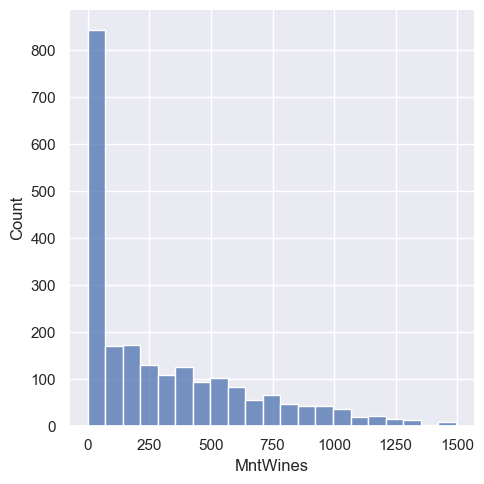

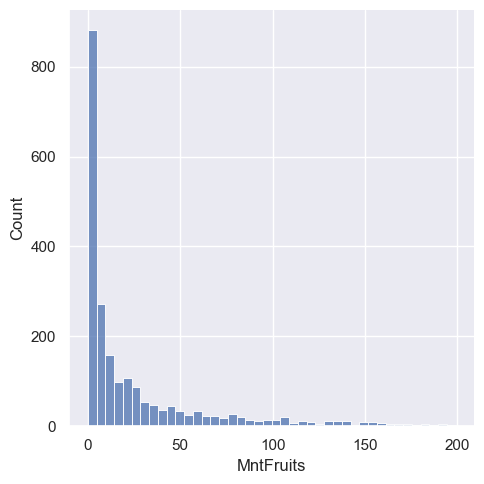

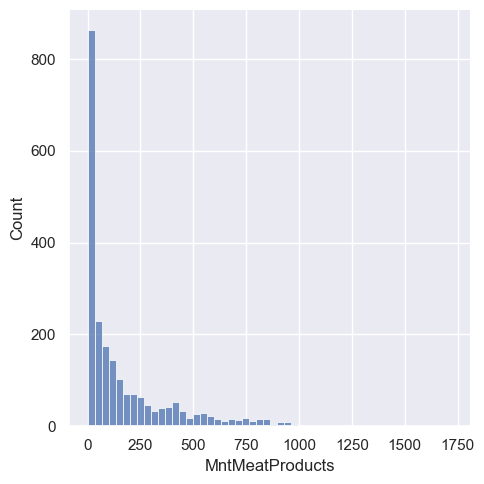

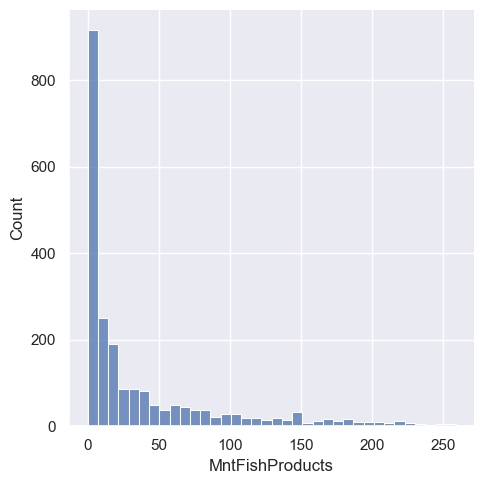

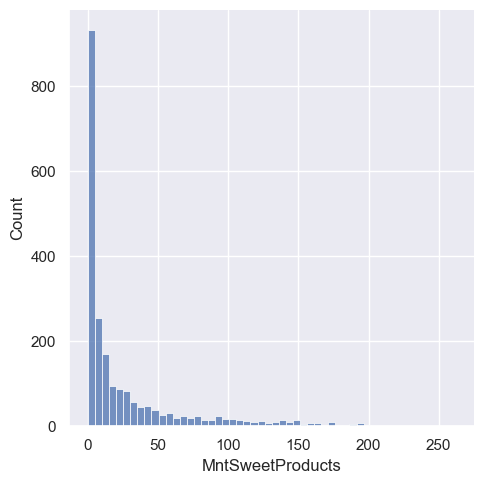

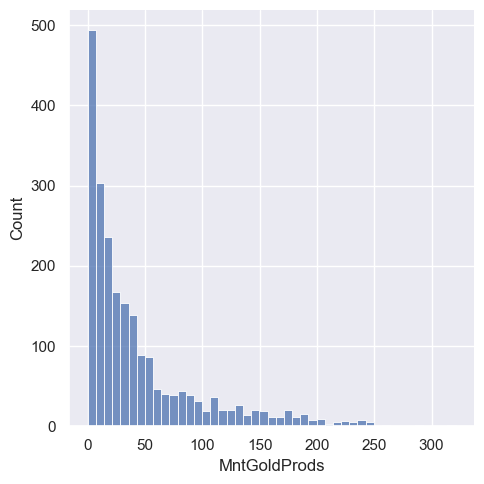

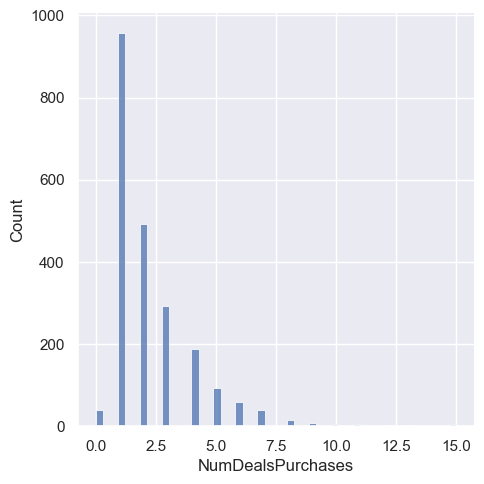

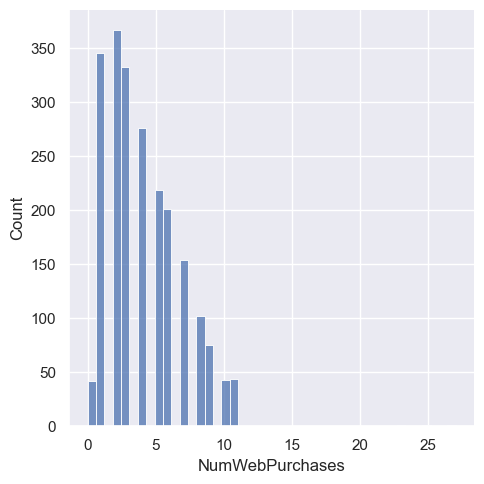

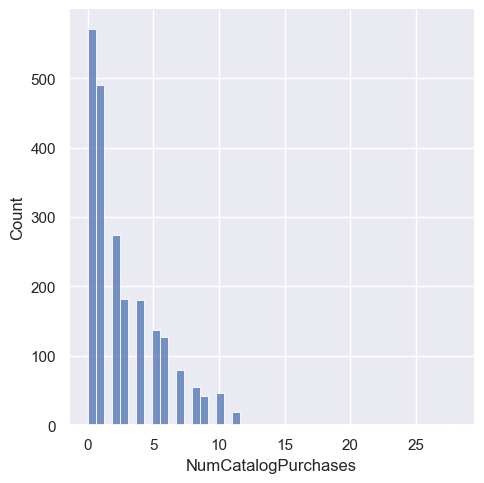

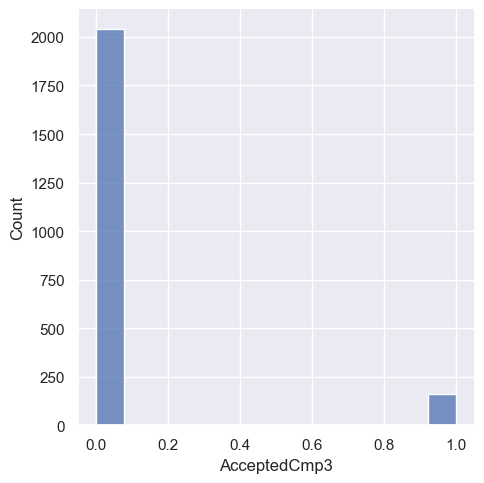

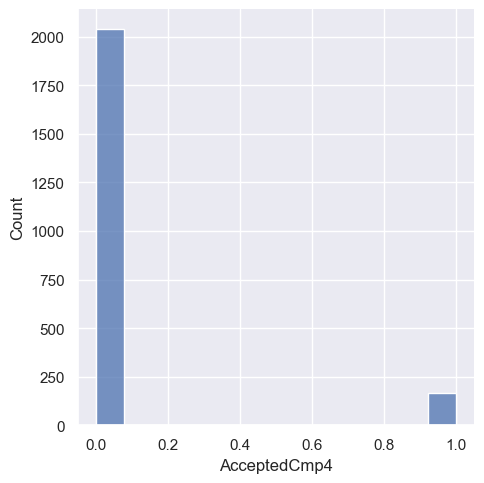

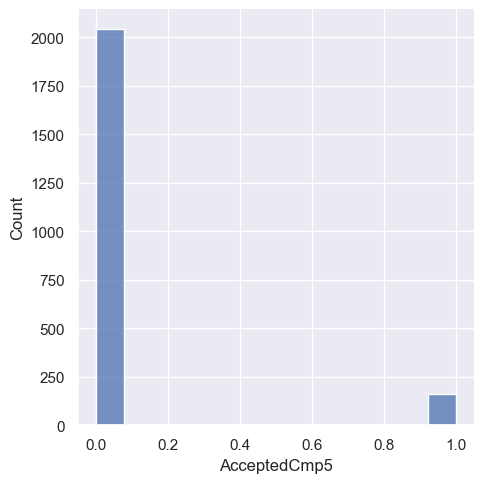

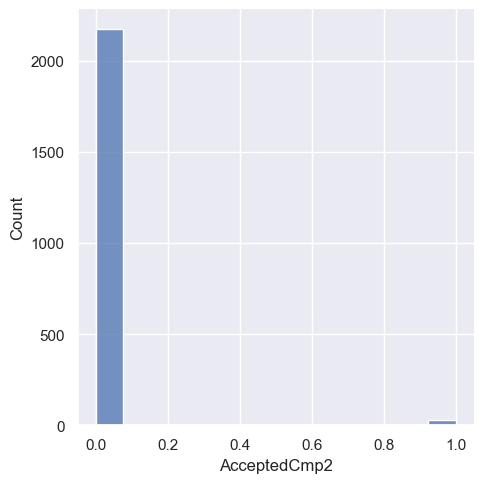

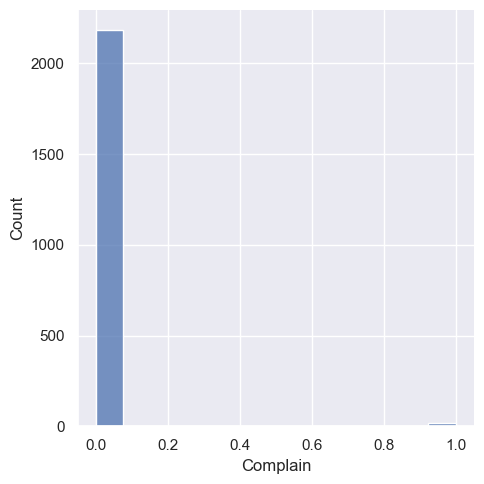

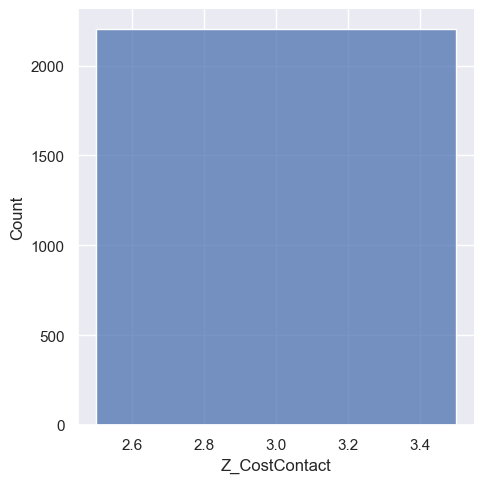

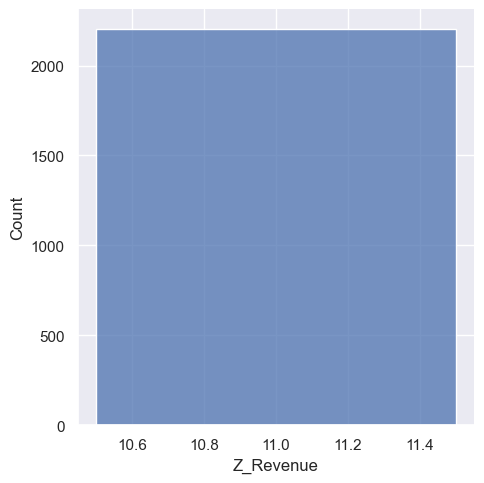

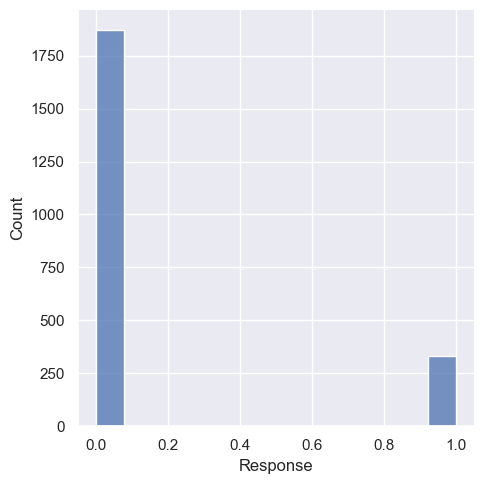

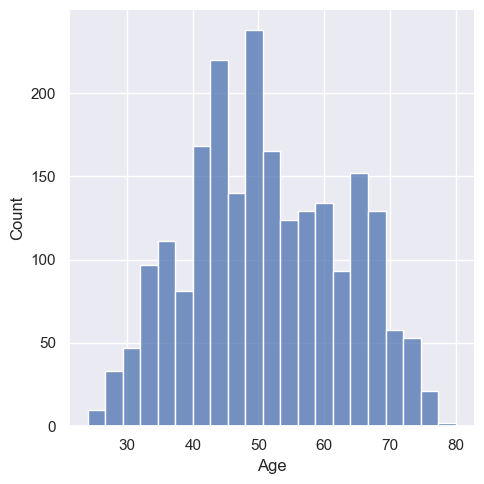

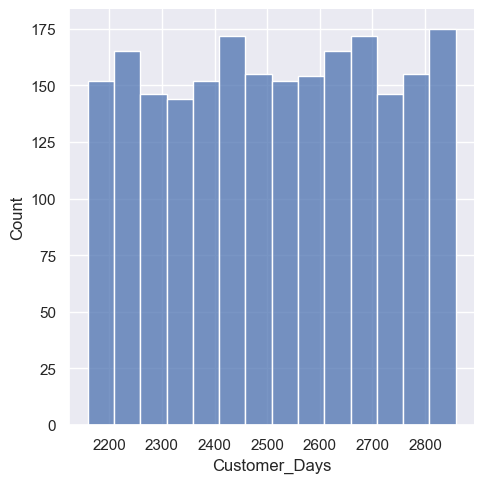

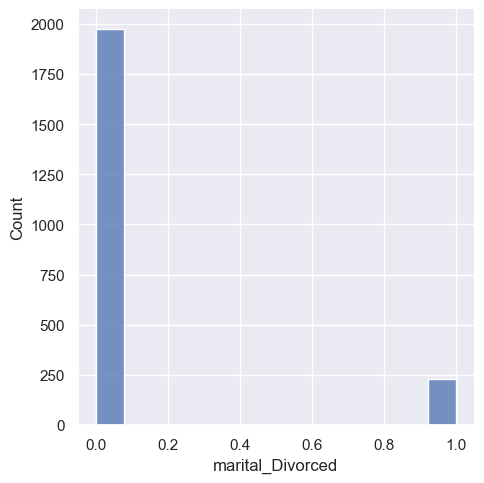

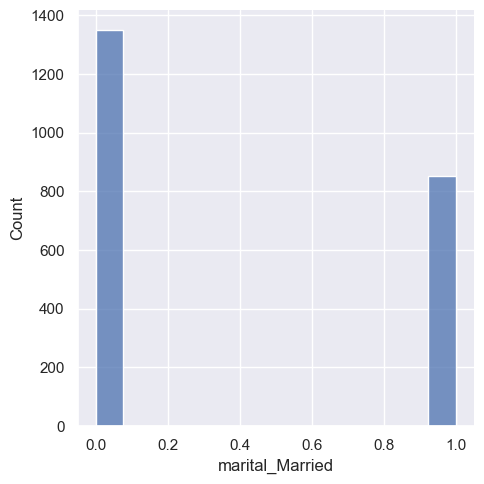

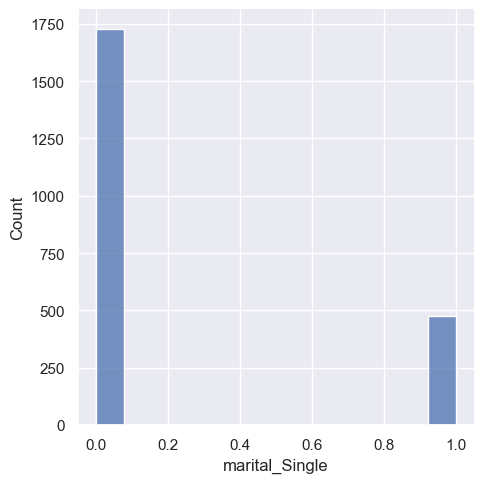

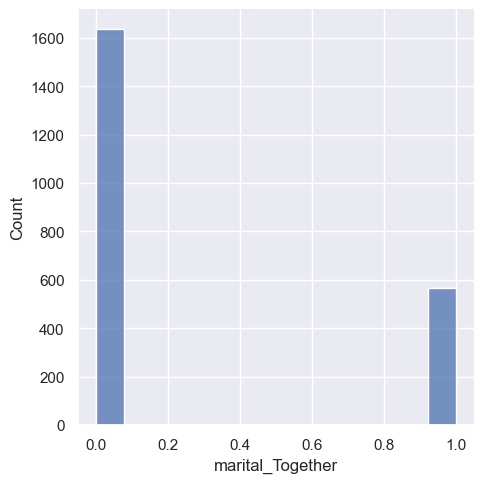

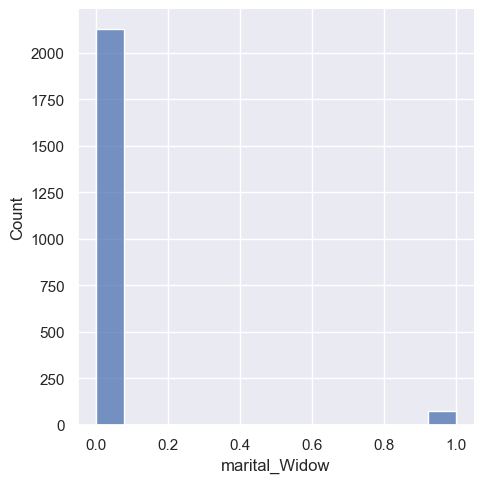

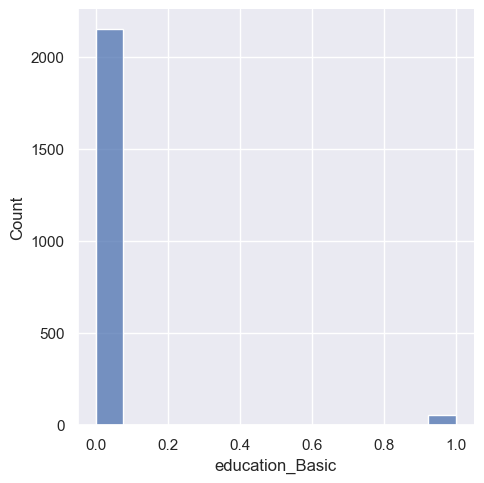

In [49]:
for i in range((len(dataset_df.columns))):
    colname = dataset_df.columns[i]
    if dataset_df[colname].dtype in ['float64','int']:
        print("""
            欄位：{colnames}
            摘要：
              {summarizes}

            -----------------------------------分佈圖-----------------------------------
              
              """.format(colnames = colname, summarizes = summarize(dataset_df[colname])))
        print(sns.displot(dataset_df[colname]))
    else :
        print("""
            欄位：{colnames}, {types}
              """.format(colnames = colname, types = dataset_df[colname].dtype))

In [7]:
#remove z_revenue and Z_costcontact
dataset_df = dataset_df.drop(columns=['Z_Revenue','Z_CostContact'])

In [8]:
dataset_df.head(10)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   
5  62513.0        0         1       16       520         42               98   
6  55635.0        0         1       34       235         65              164   
7  33454.0        1         0       32        76         10               56   
8  30351.0        1         0       19        14          0               24   
9   5648.0        1         1       68        28          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   
5                0                42            14  ...                 1   
6               50                49            27  ...                 0   
7                3                 1            23  ...                 0   
8                3                 3             2  ...                 1   
9                1                 1            13  ...                 1   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   
5              0                   0                0                     0   
6              0                   0                0                     1   
7              0                   0                0                     0   
8              0                   0                0                     0   
9              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   
5                 1              0       702              688   
6                 0              0       563              536   
7                 0              1       146              123   
8                 0              1        44               42   
9                 0              1        36               23   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0  
6                   0  
7                   0  
8                   0  
9                   1  

[10 rows x 37 columns]

In [9]:
#observe the number of response for the promotion
dataset_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [35]:
response_df = dataset_df['Response'].value_counts().reset_index()
response_rt = response_df[response_df['Response'] == 1]['count'] / response_df['count'].sum()
print("Response Rate of All Promotions: {:.2f}".format(response_rt.values[0]))

Response Rate of All Promotions: 0.15


In [21]:
plt.bar(data=dataset_df['Response'].value_counts().reset_index(), x= 'Response',  height = 'count')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Response Distribution')
plt.show()

In [40]:
dataset_df['Income'].describe()
ifnull_income = dataset_df['Income'].isnull().sum()
print("Number of null of Income: {}".format(ifnull_income))
print(dataset_df[dataset_df['Income'].isnull()])

Number of null of Income: 0
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 37 columns]


In [41]:
dataset_df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [ ]:
dataset_df['Income_z'] = stats.zscore(dataset_df['Income'])
print(dataset_df['Income_z'].describe())


count    2.205000e+03
mean     2.255691e-17
std      1.000227e+00
min     -2.409272e+00
25%     -7.932106e-01
50%     -1.618161e-02
75%      8.044529e-01
max      2.999363e+00
Name: Income_z, dtype: float64


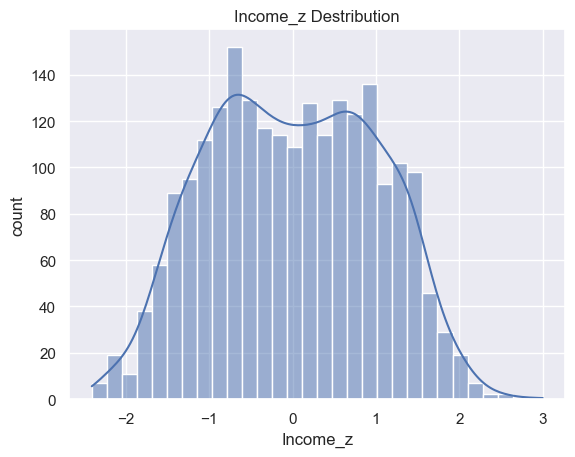

In [51]:
sns.histplot(dataset_df['Income_z'], kde = True, bins = 30)
plt.xlabel('Income_z')
plt.ylabel('count')
plt.title('Income_z Destribution')
plt.show()

In [54]:
#calculate total times purchases
dataset_df['NumTotalPurchases'] = dataset_df['NumWebPurchases'] + dataset_df['NumCatalogPurchases'] + dataset_df['NumStorePurchases'] + dataset_df['NumDealsPurchases']
#calculate mean amount per purchase
dataset_df['MeanAmtPerPurchase'] = dataset_df['MntTotal'] / dataset_df['NumTotalPurchases']

Text(0.5, 1.0, 'MeanAmtPerPurchase Destribution')

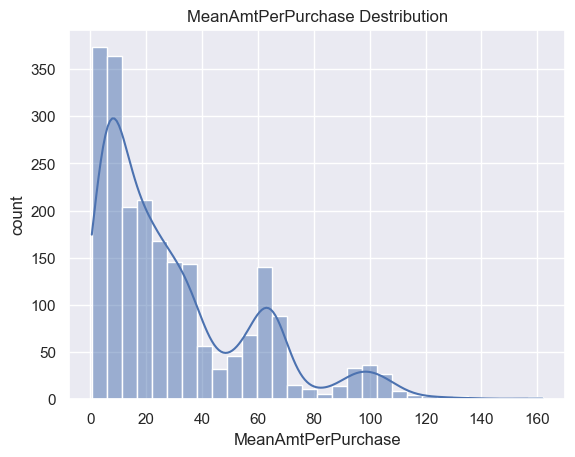

In [56]:
sns.histplot(dataset_df['MeanAmtPerPurchase'], kde = True, bins = 30)
plt.xlabel('MeanAmtPerPurchase')
plt.ylabel('count')
plt.title('MeanAmtPerPurchase Destribution')

In [ ]:
MeanAmtPerPurchase_log = np.log10(dataset_df['MeanAmtPerPurchase'] + 1)
#print(MeanAmtPerPurchase_log)
dataset_df['MeanAmtPerPurchase_log'] = MeanAmtPerPurchase_log
#print(dataset_df['MeanAmtPerPurchase_log'].head(100))


0       1.793511
1       0.653213
2       1.555728
3       0.845098
4       1.350656
          ...   
2200    1.790832
2201    1.318443
2202    1.813265
2203    1.544068
2204    1.168122
Name: MeanAmtPerPurchase, Length: 2205, dtype: float64
0     1.793511
1     0.653213
2     1.555728
3     0.845098
4     1.350656
        ...   
95    1.731991
96    0.698970
97    1.171614
98    1.525045
99    1.149561
Name: MeanAmtPerPurchase_log, Length: 100, dtype: float64


Text(0.5, 1.0, 'MeanAmtPerPurchase_log Destribution ')

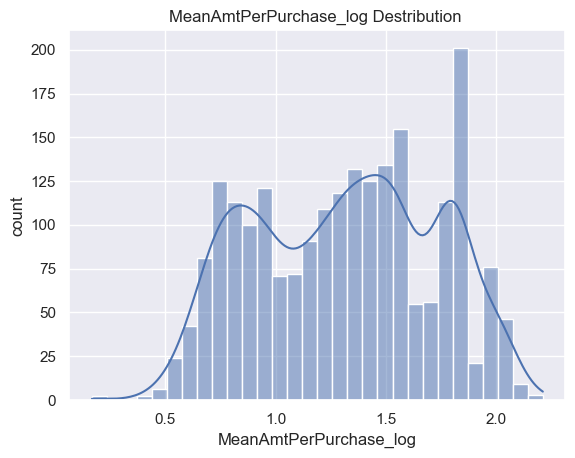

In [62]:
sns.histplot(dataset_df['MeanAmtPerPurchase_log'], kde = True, bins = 30)
plt.xlabel('MeanAmtPerPurchase_log')
plt.ylabel('count')
plt.title('MeanAmtPerPurchase_log Destribution ')

In [ ]:
dataset_df_columns = dataset_df.columns.to_list()
print (dataset_df_columns)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Income_z', 'NumTotalPurchases', 'MeanAmtPerPurchase', 'MeanAmtPerPurchase_log']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


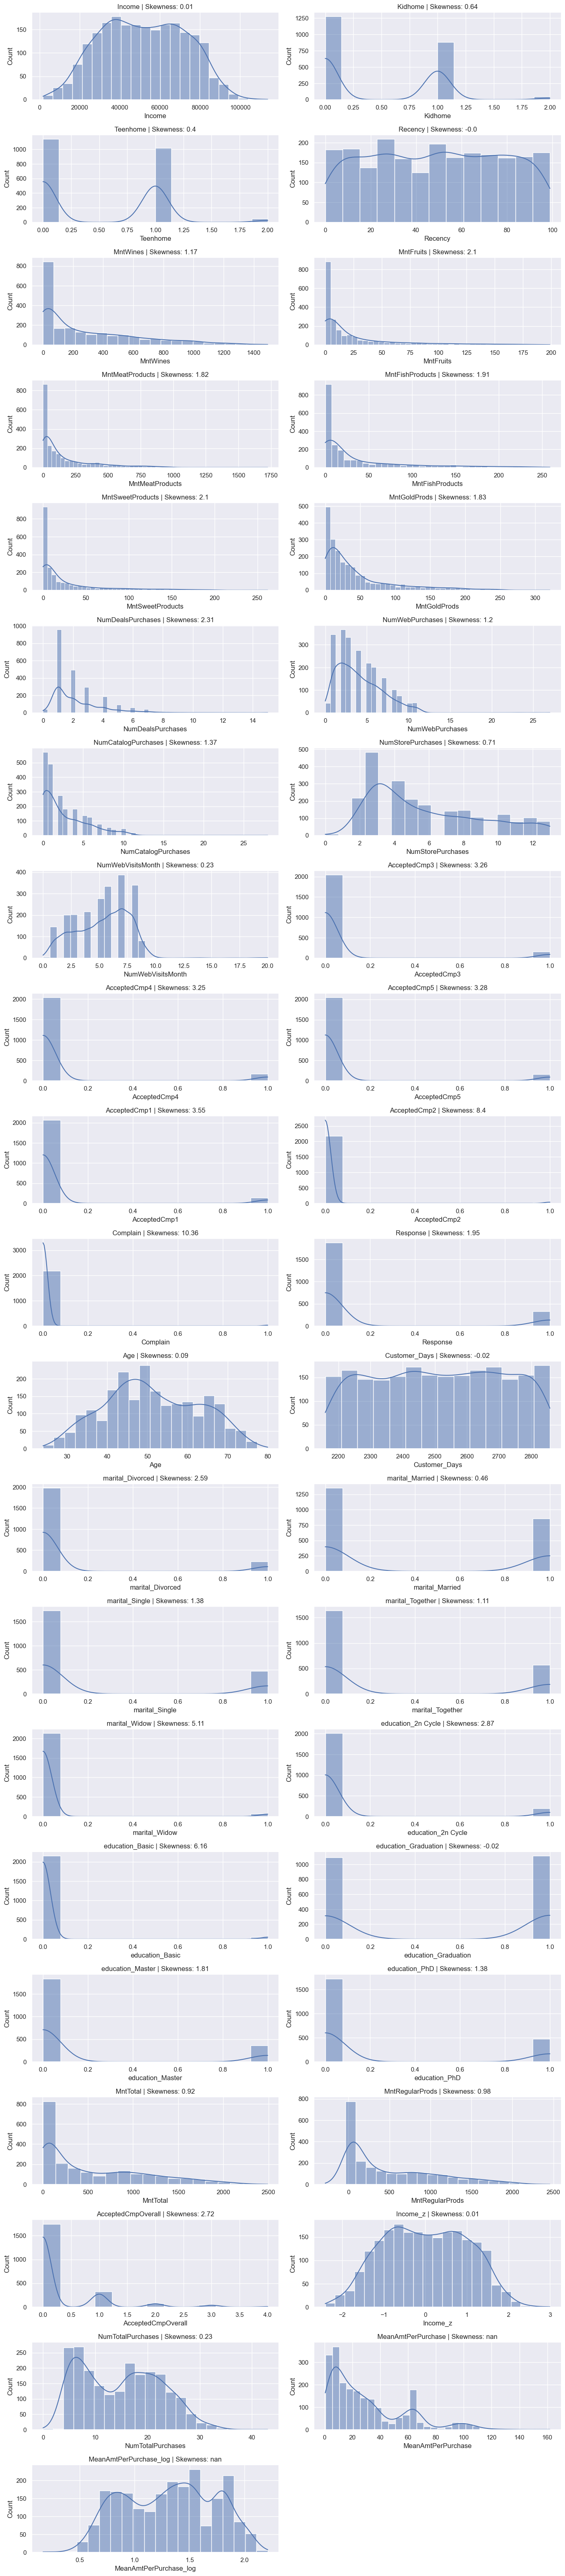

In [ ]:
plt.figure(figsize=(14, len(dataset_df) * 3))
for idx, feature in enumerate(dataset_df, 1):
    plt.subplot(len(dataset_df), 2, idx)
    sns.histplot(dataset_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset_df[feature].skew(), 2)}") #observe skewness of each numerical feature

plt.tight_layout()
plt.show()

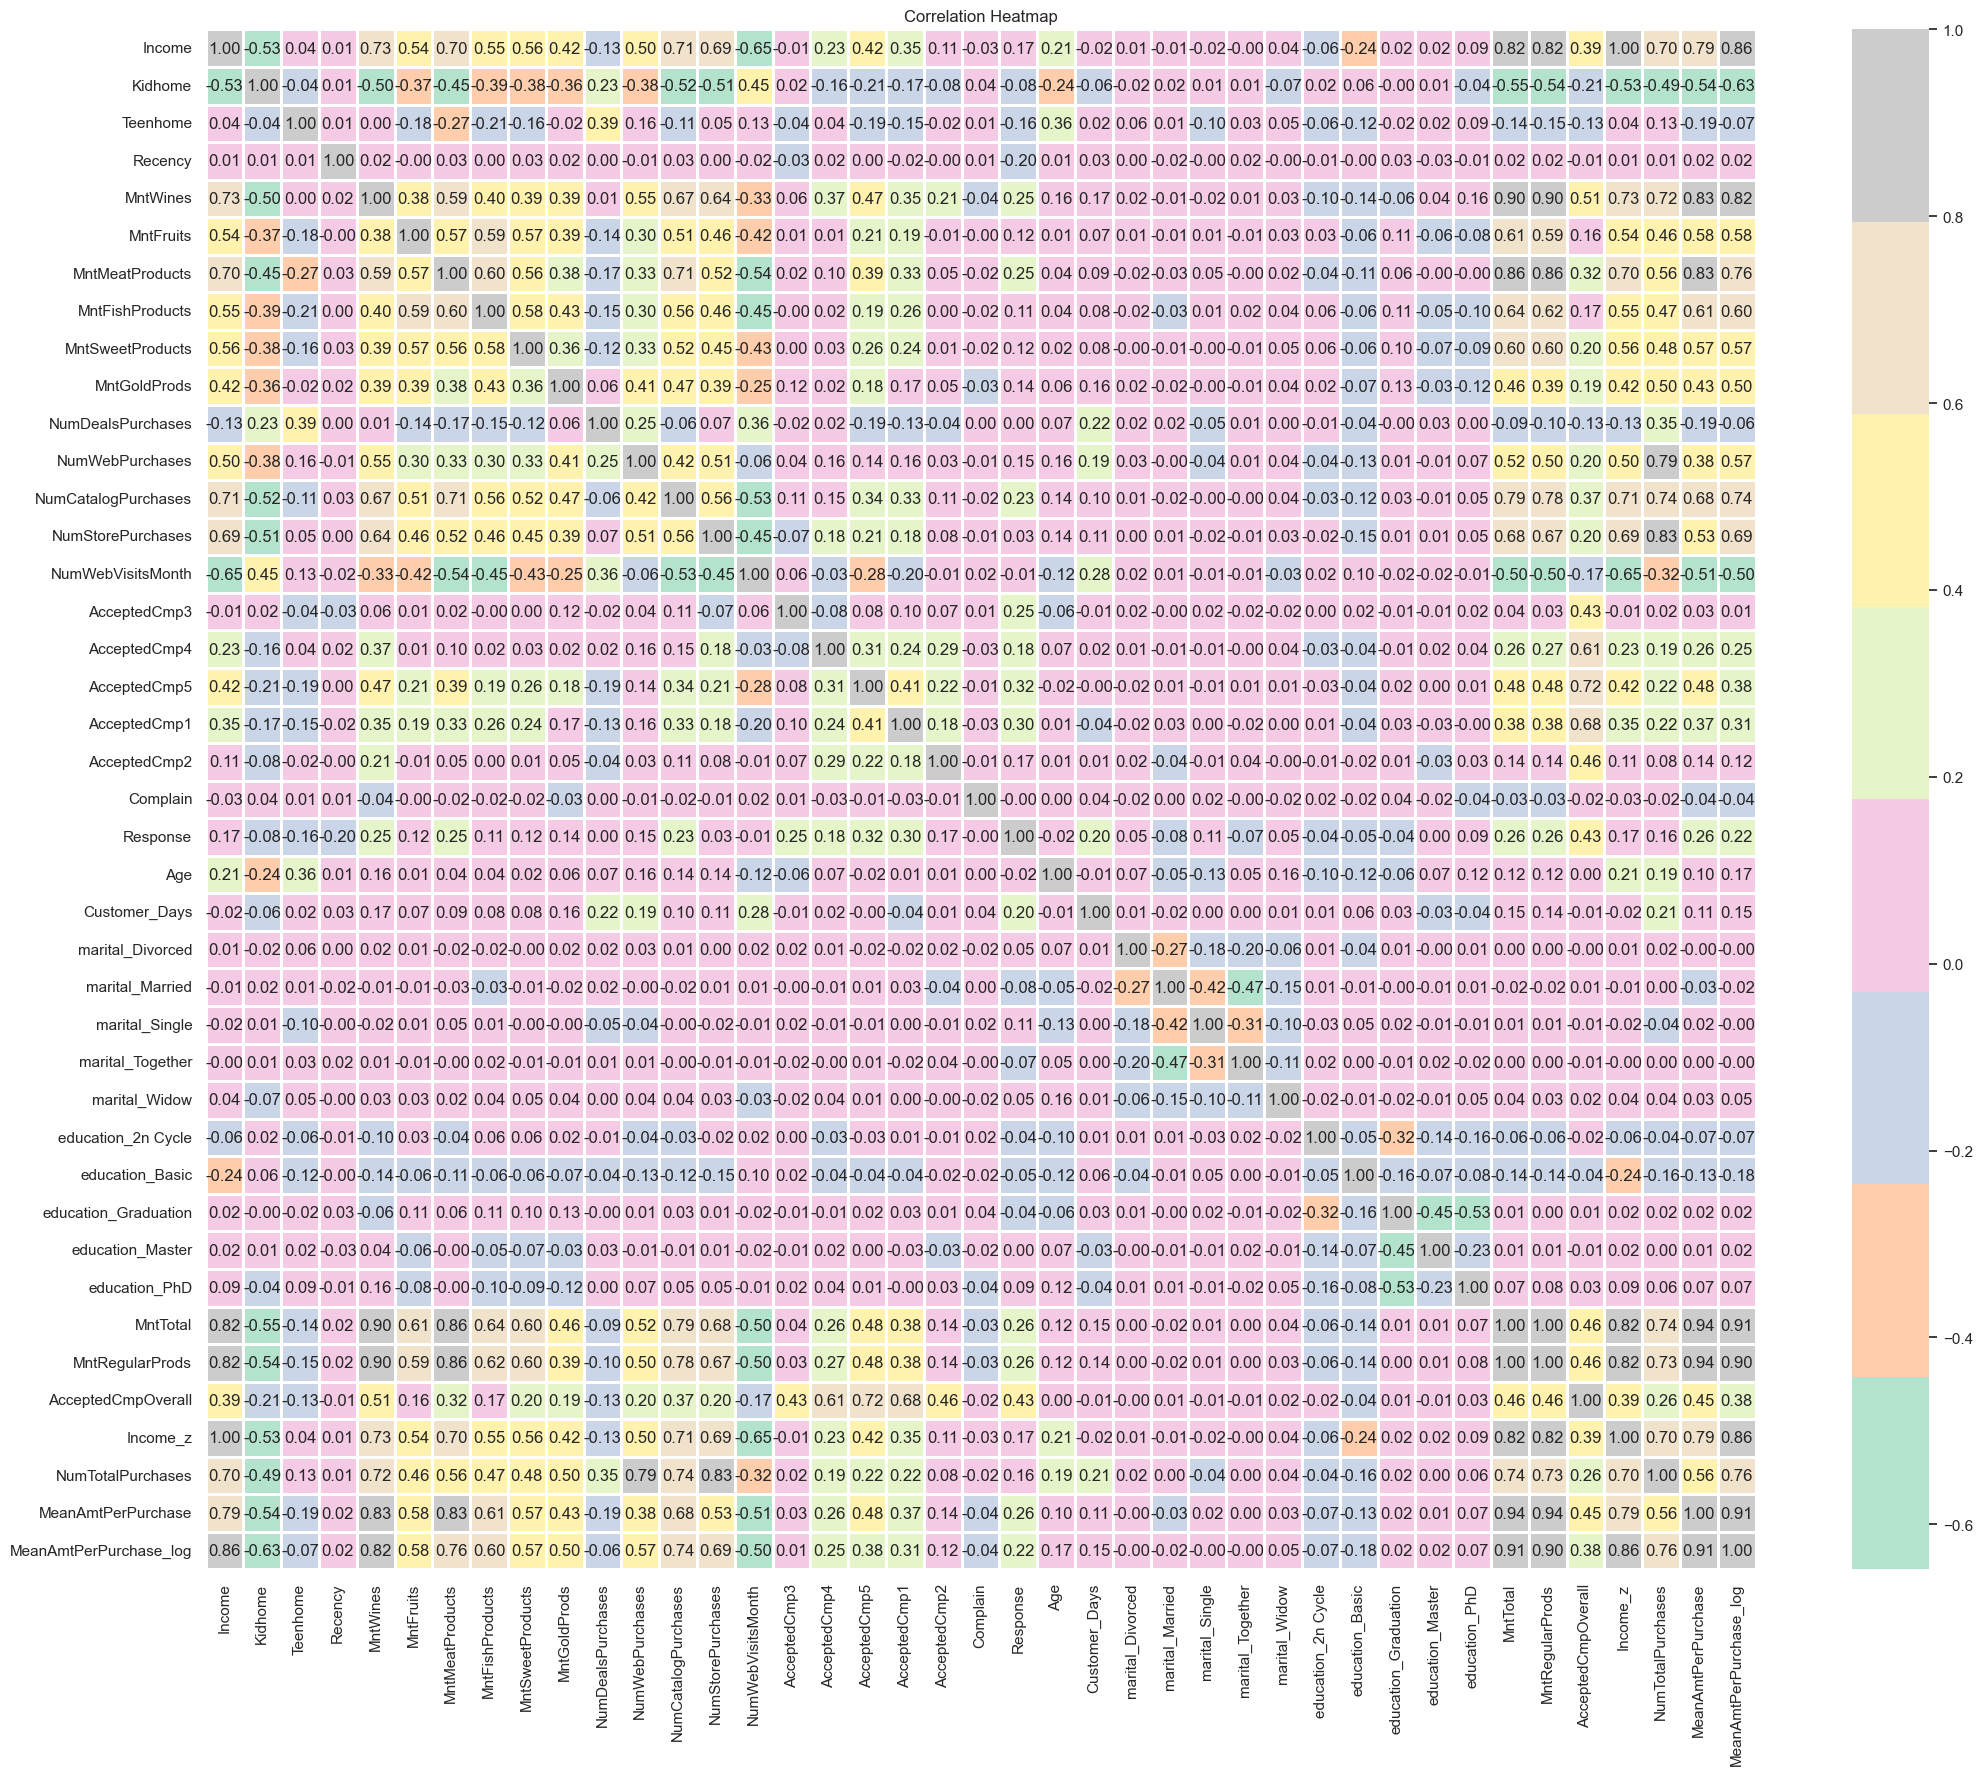

In [69]:
plt.figure(figsize=(25, 20))

sns.heatmap(dataset_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

In [83]:
# get purchase perferences by calculating the ratio of each purchase type to total purchases
dataset_df['MntMeatProducts_ratio'] = dataset_df['MntMeatProducts'] / dataset_df['MntTotal']
dataset_df['MntFishProducts_ratio'] = dataset_df['MntFishProducts'] / dataset_df['MntTotal']
dataset_df['MntSweetProducts_ratio'] = dataset_df['MntSweetProducts'] / dataset_df['MntTotal']
dataset_df['MntFruits_ratio'] = dataset_df['MntFruits'] / dataset_df['MntTotal']
dataset_df['MntGoldProds_ratio'] = dataset_df['MntGoldProds'] / dataset_df['MntTotal']
dataset_df['MntWines_ratio'] = dataset_df['MntWines'] / dataset_df['MntTotal']
dataset_df['MntRegularProds_ratio'] = dataset_df['MntRegularProds'] / dataset_df['MntTotal']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


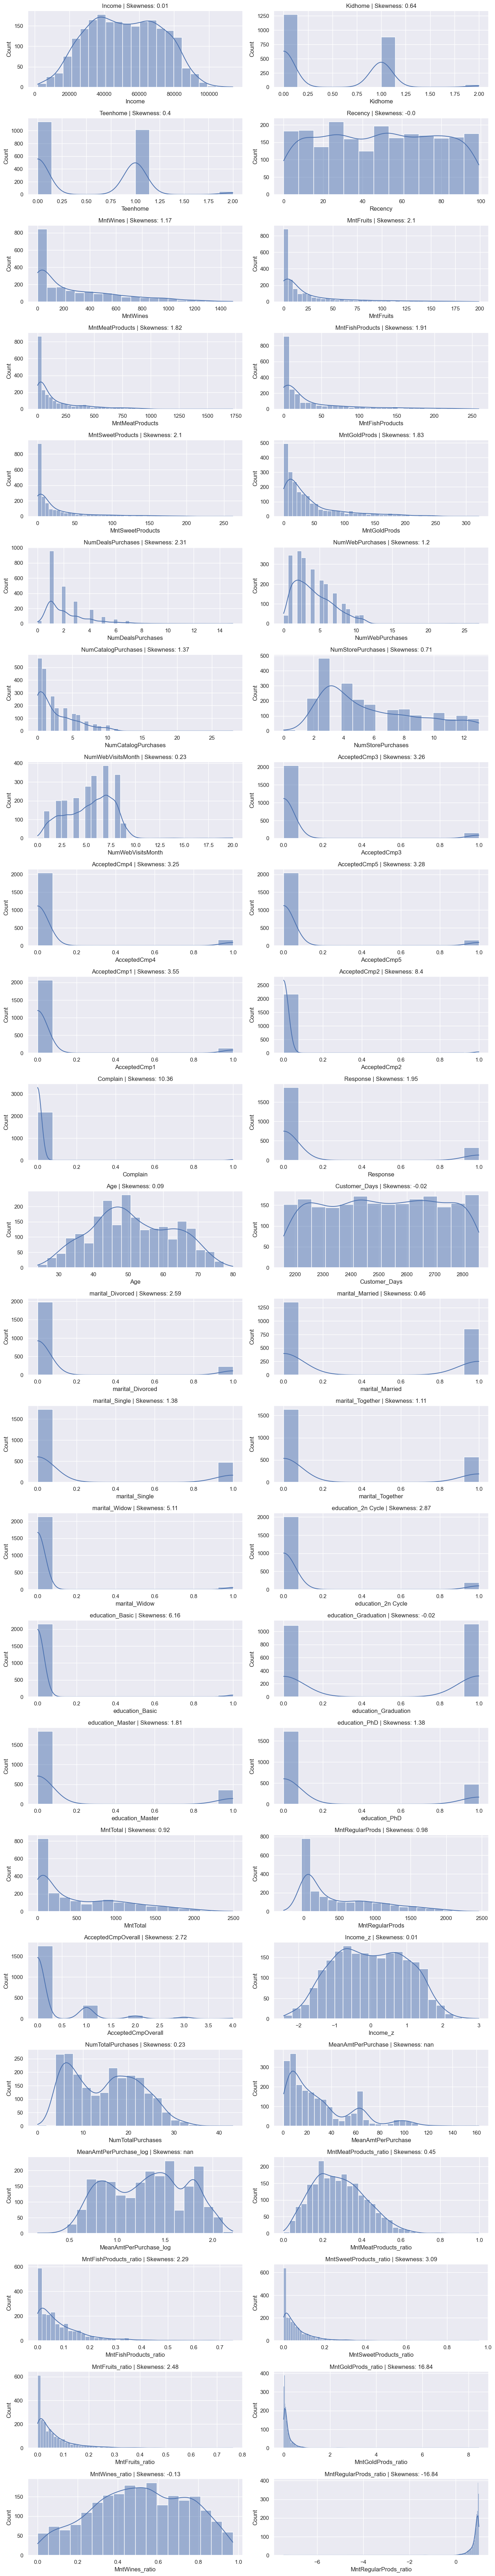

In [84]:
plt.figure(figsize=(14, len(dataset_df) * 3))
for idx, feature in enumerate(dataset_df, 1):
    plt.subplot(len(dataset_df), 2, idx)
    sns.histplot(dataset_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset_df[feature].skew(), 2)}") #observe skewness of each numerical feature

plt.tight_layout()
plt.show()

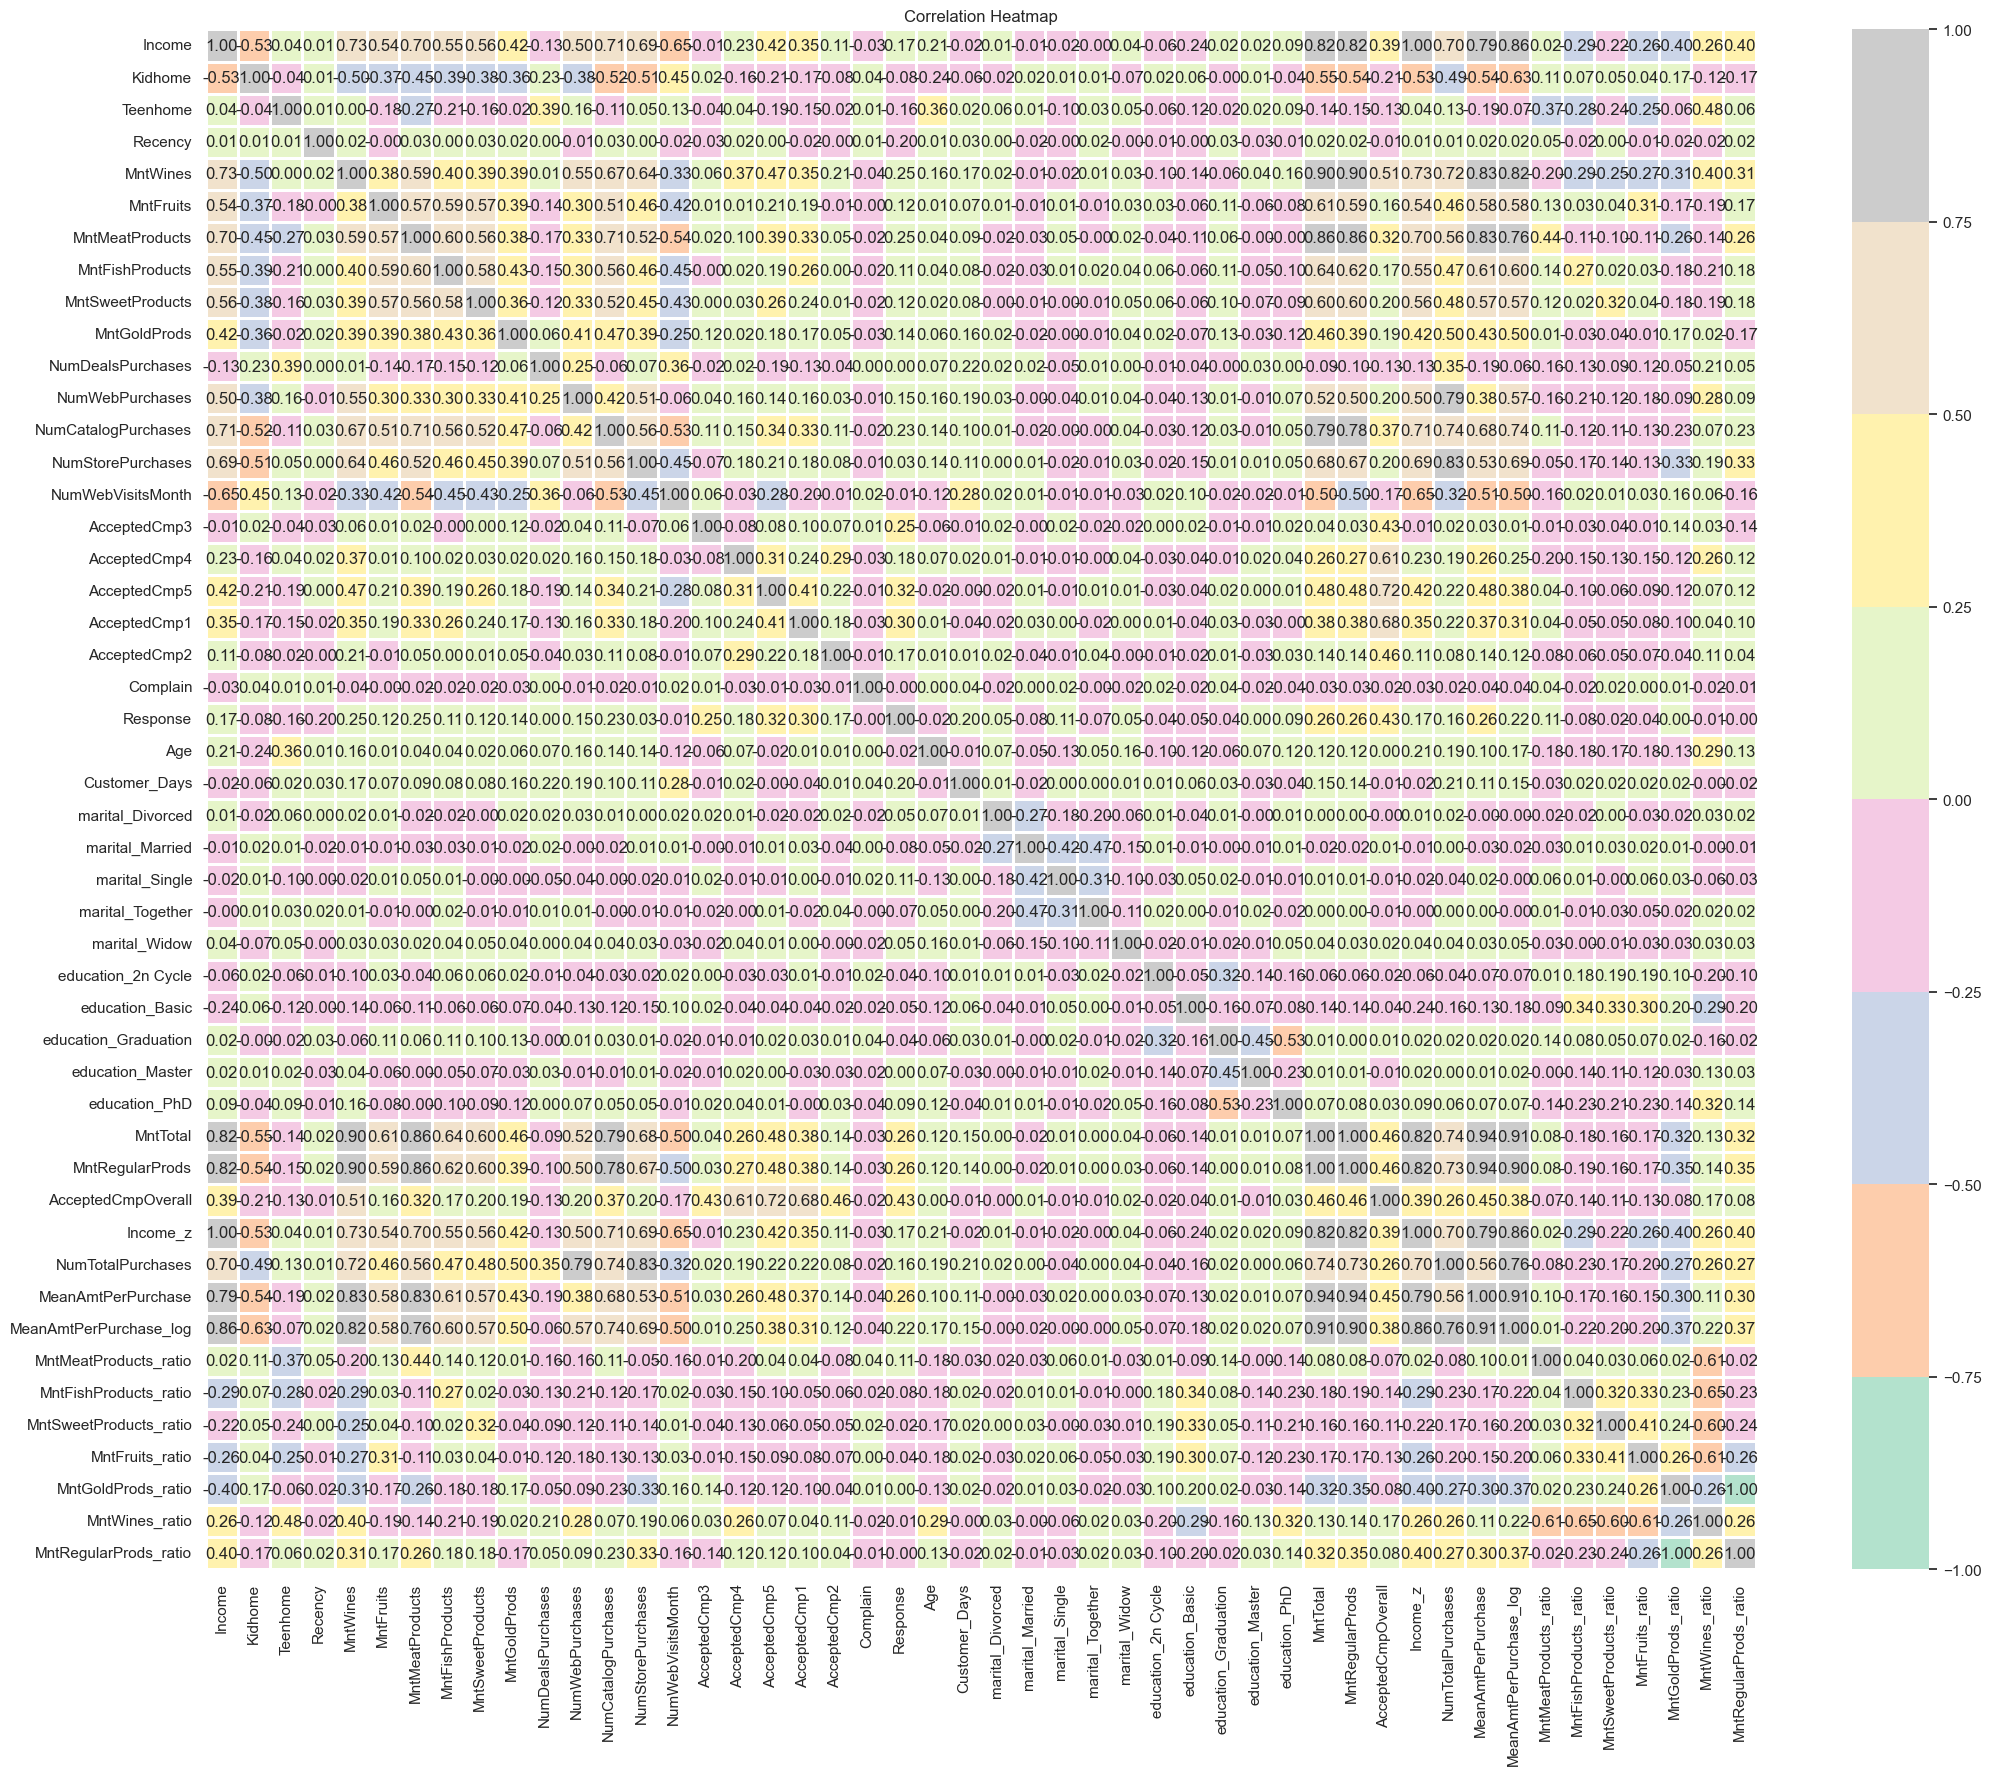

In [85]:
plt.figure(figsize=(25, 20))

sns.heatmap(dataset_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

In [87]:
dataset_df_columns = dataset_df.columns.to_list()

In [ ]:
#remove original amount spent columns and Income, MeanAmtPerPurchase for correlation analysis
dataset_df_columns_new = dataset_df_columns.copy()
dataset_df_columns_new.remove('MntMeatProducts')
dataset_df_columns_new.remove('MntFishProducts')
dataset_df_columns_new.remove('MntSweetProducts')
dataset_df_columns_new.remove('MntFruits')
dataset_df_columns_new.remove('MntGoldProds')
dataset_df_columns_new.remove('MntWines')
dataset_df_columns_new.remove('MntRegularProds')
dataset_df_columns_new.remove('MntTotal')
dataset_df_columns_new.remove('Income')
dataset_df_columns_new.remove('MeanAmtPerPurchase')
dataset_selected_columns = dataset_df[dataset_df_columns_new]

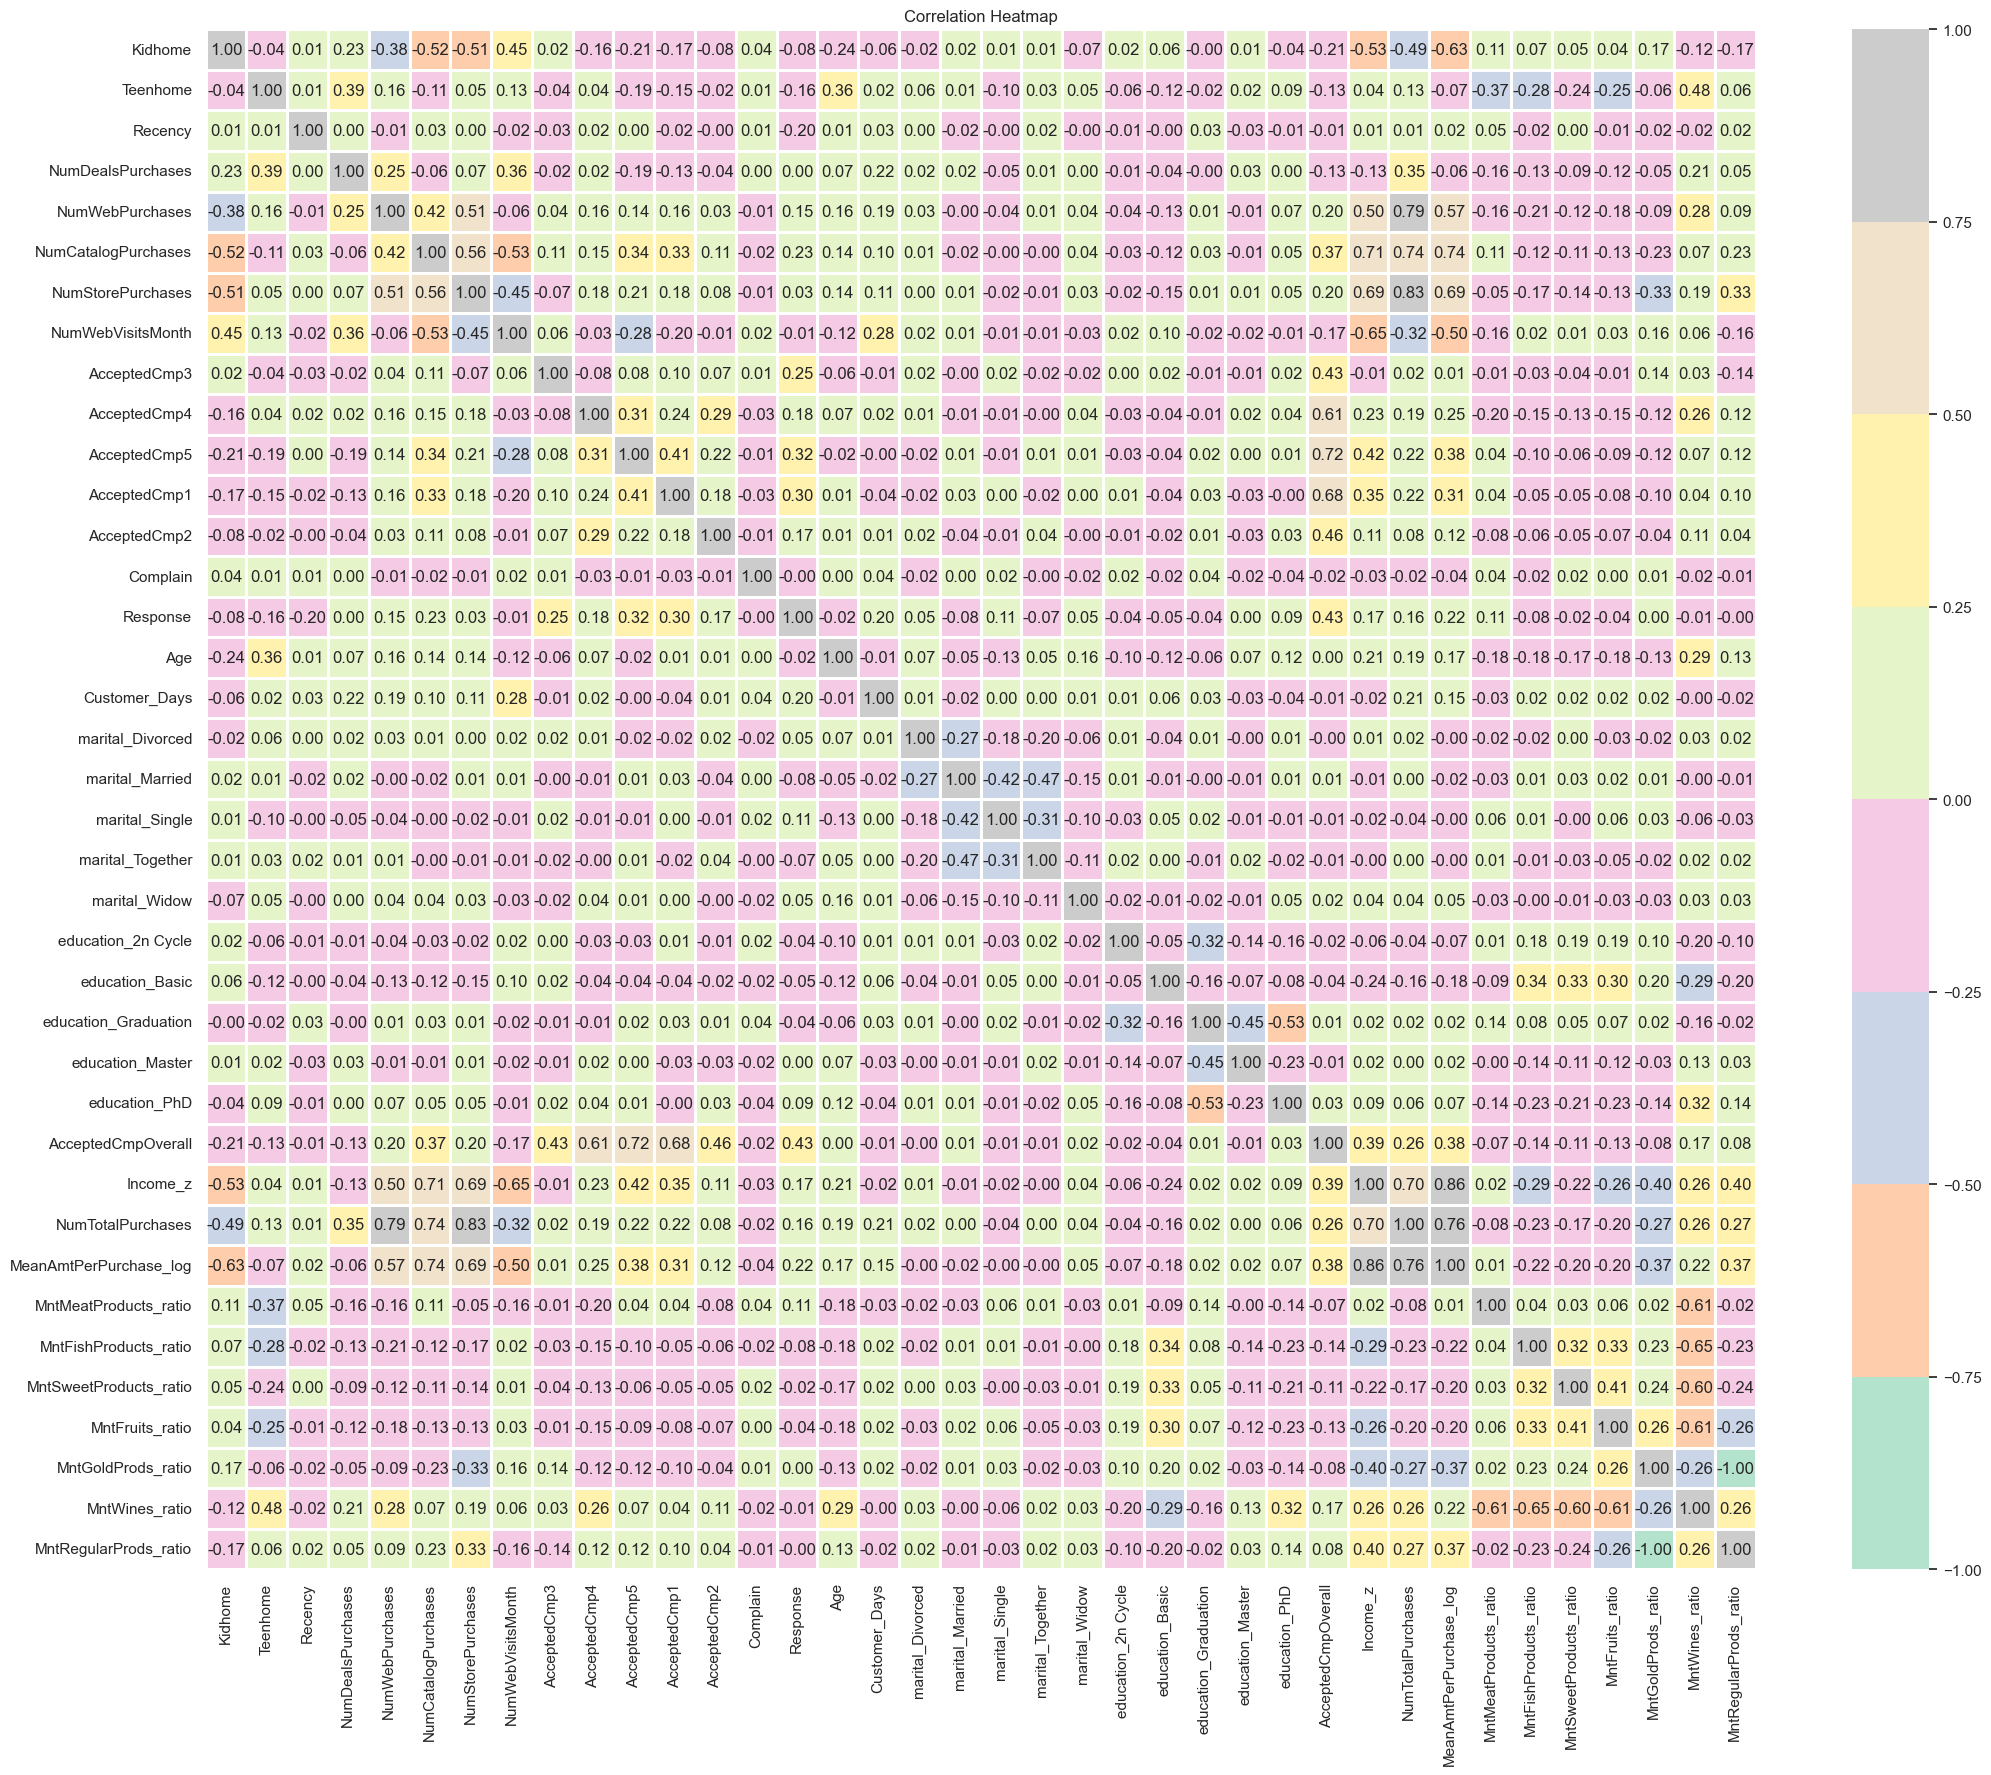

In [98]:
plt.figure(figsize=(25, 20))

sns.heatmap(dataset_selected_columns.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()